In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
# Generate engine sizes between 0.8L to 5.0L
np.random.seed(42)
engine_size = np.random.uniform(0.8, 5.0, 100)

# Generate mileage using a nonlinear polynomial relationship
# Example: mileage = 50 - 10*x + 1.2*x^2 + some noise
noise = np.random.normal(0, 2, 100)
mileage = 50 - 10*engine_size + 1.2*engine_size**2 + noise

# Stack into 2D array
data_points = np.column_stack((engine_size, mileage))

[ 2.3730685  33.20115407]
[ 4.79300009 29.03940423]
[ 3.87437456 29.45270983]
[ 3.31436563 26.0632293 ]
[ 1.45527829 37.54927521]
[ 1.45517699 38.70350336]
[ 1.04395117 43.82407724]
[ 4.43793981 28.21843317]
[ 3.32468305 28.40040316]
[ 3.77390483 28.34826681]


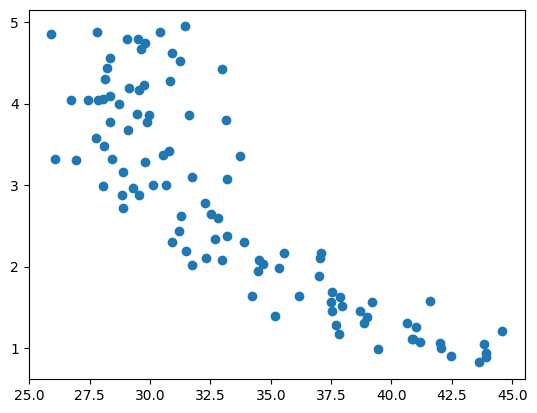

In [10]:
plt.scatter(mileage,engine_size)

In [40]:
X = pd.DataFrame(mileage)
y = engine_size

In [32]:
X

array([33.20115407, 29.03940423, 29.45270983, 26.0632293 , 37.54927521,
       38.70350336, 43.82407724, 28.21843317, 28.40040316, 28.34826681,
       43.90921817, 30.42391084, 28.12729929, 37.54301543, 37.49156384,
       39.19330709, 32.99850989, 30.13355905, 31.27474887, 31.75316948,
       30.52093713, 38.9681452 , 34.67066308, 32.70716035, 28.86300794,
       28.33107724, 36.1504016 , 29.3099892 , 29.77026366, 42.04543345,
       33.736066  , 37.94578216, 41.16508675, 29.47705207, 25.89876938,
       29.11462062, 34.51525671, 44.58182274, 29.07347098, 32.53504558,
       38.87234895, 28.81671755, 43.91166943, 30.91621745, 36.98566556,
       27.75726138, 37.05212476, 28.04059427, 31.71550275, 41.59902577,
       27.78302063, 28.04888541, 29.76857672, 28.34374374, 26.94356891,
       29.61007127, 37.806076  , 37.87735813, 39.43761756, 37.0678761 ,
       31.20919142, 34.47398235, 30.80930475, 30.89360398, 35.35979379,
       33.19973024, 35.19101783, 29.53594225, 40.87546242, 31.45

In [28]:
y

array([2.3730685 , 4.79300009, 3.87437456, 3.31436563, 1.45527829,
       1.45517699, 1.04395117, 4.43793981, 3.32468305, 3.77390483,
       0.88645488, 4.87362138, 4.29625909, 1.69182426, 1.56366486,
       1.57029894, 2.07781742, 3.00397701, 2.61416908, 2.02316239,
       3.36978216, 1.38587421, 2.02700752, 2.33871974, 2.71549393,
       4.09773904, 1.63862989, 2.95978464, 3.28814119, 0.99509173,
       3.35168838, 1.51620132, 1.07321669, 4.78531926, 4.85565454,
       4.19526886, 2.07937783, 1.21022288, 3.67377871, 2.64864047,
       1.31256059, 2.87974302, 0.94443179, 4.61914569, 1.88687592,
       3.58259359, 2.10918652, 2.98428569, 3.09618317, 1.57638871,
       4.87225544, 4.05555786, 4.74589555, 4.55827487, 3.31117991,
       4.67187179, 1.17166851, 1.62312802, 0.98995461, 2.16638739,
       2.43244462, 1.93966593, 4.28069754, 2.29836397, 1.97992494,
       3.07932355, 1.39188174, 4.16922732, 1.1131127 , 4.94492513,
       4.04342803, 1.63460586, 0.82319289, 4.224938  , 3.76880

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [36]:
lr = LinearRegression()

In [44]:
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
y_pridict = lr.predict(x_test)

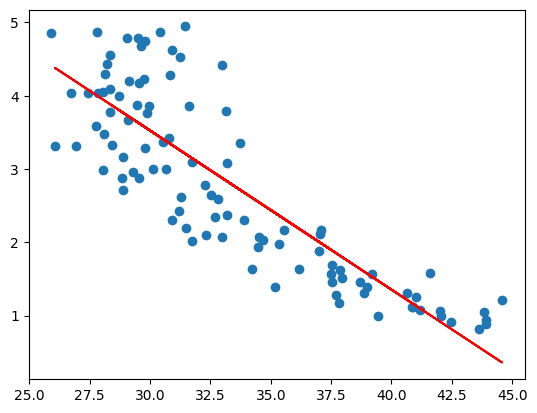

In [58]:
plt.scatter(X,y)
plt.plot(x_test,y_pridict,color = "red")

In [64]:
r2 = r2_score(y_test,y_pridict)

In [66]:
r2

0.6431794958214831

In [112]:
poly = PolynomialFeatures(degree=100)

In [95]:
x_poly = poly.fit_transform(x_train)

In [97]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)
lr.fit(x_poly,y_train)
y_prid = lr.predict(x_test)

LinearRegression()

In [99]:
y_prid = lr.predict(x_test)

ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

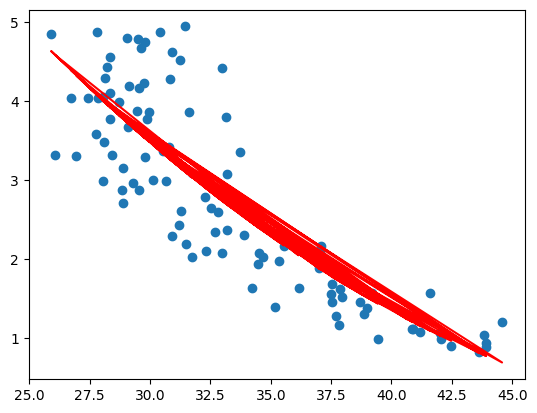

In [100]:
plt.scatter(X,y)
plt.plot(X,y_prid, color = "red")

In [114]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Transform to polynomial features
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

# Fit the model
lr = LinearRegression()
lr.fit(x_poly_train, y_train)

# Predict
y_pred = lr.predict(x_poly_test)

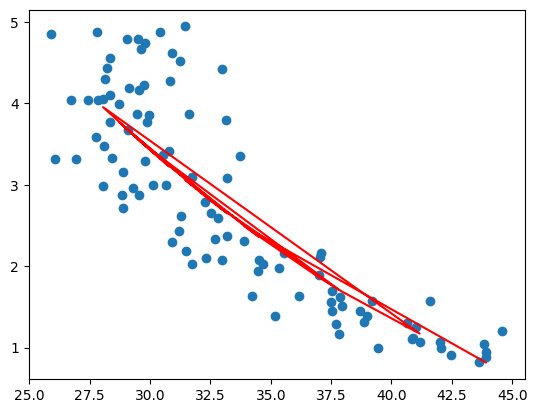

In [116]:
plt.scatter(X,y)
plt.plot(x_test,y_pred, color = "red")